In [49]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
from Sampling import Uniform, Asym_left, Asym_right
from SC_Generative import calculate_choice_and_rewards
from BE import Noise_generator, Delta_repulsion, update_distribution, Delta_learning
from Fitter import post_correct_update_matrix, total_psychometric
from scipy.stats import norm, uniform

**Category A update**

[1]


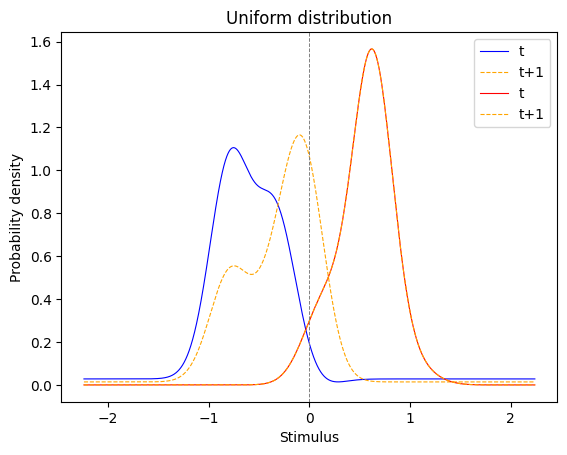

In [50]:
# --- simulation setup ---
gamma = 0.5
sigma_update = 0.2
sigma_noise = 0.1
A_repulsion = 0.2
seed = 1
n_samples = 1000
seed_sample = 210
burn_in_seed = 5*seed
# stimulus space
s_uniform = Uniform(n_samples, 85)
s_tilde_uniform = s_uniform + Noise_generator(len(s_uniform), seed, sigma_noise)
s_hat_uniform = Delta_repulsion(A_repulsion, s_tilde_uniform)
categories_uniform = np.where(s_uniform > 0, 1, 0)

# x for model
max_r = 1 + 6*sigma_noise + 2*A_repulsion*(1+6*sigma_noise)
min_r = -1 - 6*sigma_noise - 2*A_repulsion*(1+6*sigma_noise)
num_points = round((max_r - min_r) * 1000)
x_model = np.linspace(min_r, max_r, num_points)

# no_response and Not_Blockstart
no_response = np.full(n_samples, False)
Not_Blockstart = np.full(n_samples, True)
Not_Blockstart[0] = False

# Initial belief of agent about each category
A_initial_distribution = norm.pdf(x_model, loc=-0.75, scale=0.5)
B_initial_distribution = norm.pdf(x_model, loc=0.75, scale=0.5)

yA_0 = A_initial_distribution
yB_0 = B_initial_distribution

# t=1000
t=1000
_,_,yA_1000_uniform, yB_1000_uniform = calculate_choice_and_rewards(x_model,yA_0, yB_0, gamma, sigma_update,
                                                                s_hat_uniform[:t], categories_uniform[:t], no_response[:t], seed)


s_hard = np.array([-0.05])
# s_tilde_hard = s_hard + Noise_generator(len(s_hard), seed, sigma_noise)
# s_hat_hard = Delta_repulsion(A_repulsion, s_tilde_hard)
categories_hard = np.where(s_hard > 0, 1, 0)
no_response_hard = np.full(1, False)
Not_Blockstart_hard = np.full(1, True)


_,reward_hard,yA_hard, yB_hard = calculate_choice_and_rewards(x_model,yA_1000_uniform,yB_1000_uniform, gamma, sigma_update,
                                                                s_hard, categories_hard, no_response_hard, seed)

print(reward_hard)

plt.plot(x_model, yA_1000_uniform, color='blue', label = 't', linewidth=0.8)
plt.plot(x_model, yA_hard, color='orange', label = 't+1',linestyle='--', linewidth=0.8)
plt.plot(x_model, yB_1000_uniform, color='red', label = 't', linewidth=0.8)
plt.plot(x_model, yB_hard, color='orange', label = 't+1',linestyle='--', linewidth=0.8)

plt.axvline(0, color='gray', linestyle='--', linewidth=0.7) # Add vertical line at 0
plt.xlabel('Stimulus')
plt.ylabel('Probability density')
plt.legend()
plt.title('Uniform distribution')
plt.show()


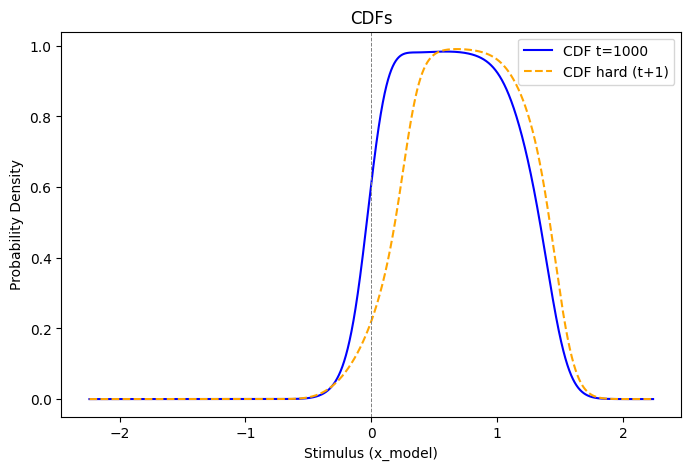

In [51]:
# Bayes rule
boundary_cdf_1000 = yB_1000_uniform/(yB_1000_uniform+yA_1000_uniform)
boundary_cdf_hard = yB_hard/(yB_hard+yA_hard)

# Calculate the numerical derivative of the CDFs to get the PDFs
pdf_1000 = np.gradient(boundary_cdf_1000, x_model)
pdf_hard = np.gradient(boundary_cdf_hard, x_model)

plt.figure(figsize=(8, 5))

# Plot the calculated PDFs
plt.plot(x_model, boundary_cdf_1000, color='blue', label='CDF t=1000', linewidth=1.5)
plt.plot(x_model, boundary_cdf_hard, color='orange', label='CDF hard (t+1)', linestyle='--', linewidth=1.5)

plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.xlabel('Stimulus (x_model)')
plt.ylabel('Probability Density')
plt.title('CDFs')
plt.legend()
plt.show()


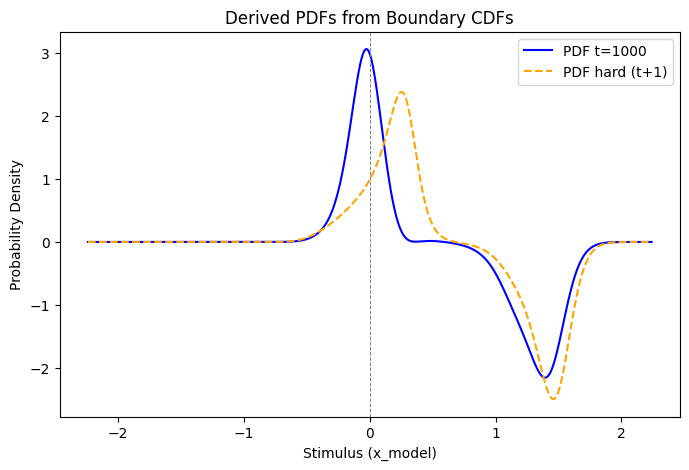

In [52]:
# Bayes rule
boundary_cdf_1000 = yB_1000_uniform/(yB_1000_uniform+yA_1000_uniform)
boundary_cdf_hard = yB_hard/(yB_hard+yA_hard)

# Calculate the numerical derivative of the CDFs to get the PDFs
pdf_1000 = np.gradient(boundary_cdf_1000, x_model)
pdf_hard = np.gradient(boundary_cdf_hard, x_model)

plt.figure(figsize=(8, 5))

# Plot the calculated PDFs
plt.plot(x_model, pdf_1000, color='blue', label='PDF t=1000', linewidth=1.5)
plt.plot(x_model, pdf_hard, color='orange', label='PDF hard (t+1)', linestyle='--', linewidth=1.5)

plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.xlabel('Stimulus (x_model)')
plt.ylabel('Probability Density')
plt.title('Derived PDFs from Boundary CDFs')
plt.legend()
plt.show()


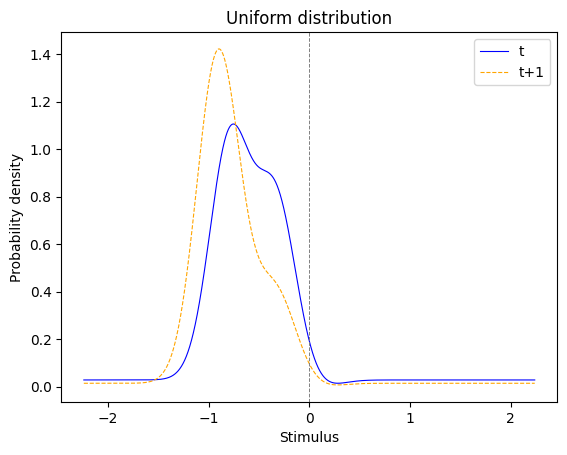

In [53]:
s_easy = np.array([-0.95])
# s_tilde_easy = s_easy + Noise_generator(len(s_easy), seed, sigma_noise)
# s_hat_easy = Delta_repulsion(A_repulsion, s_tilde_easy)
categories_easy = np.where(s_easy > 0, 1, 0)
no_response_easy = np.full(1, False)
Not_Blockstart_easy = np.full(1, True)

_,reward_easy,yA_easy, yB_easy = calculate_choice_and_rewards(x_model,yA_1000_uniform,yB_1000_uniform, gamma, sigma_update,
                                                                s_easy, categories_easy, no_response_easy, seed)


plt.plot(x_model, yA_1000_uniform, color='blue', label = 't', linewidth=0.8)
plt.plot(x_model, yA_easy, color='orange', label = 't+1',linestyle='--', linewidth=0.8)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7) # Add vertical line at 0
plt.xlabel('Stimulus')
plt.ylabel('Probability density')
plt.legend()
plt.title('Uniform distribution')
plt.show()

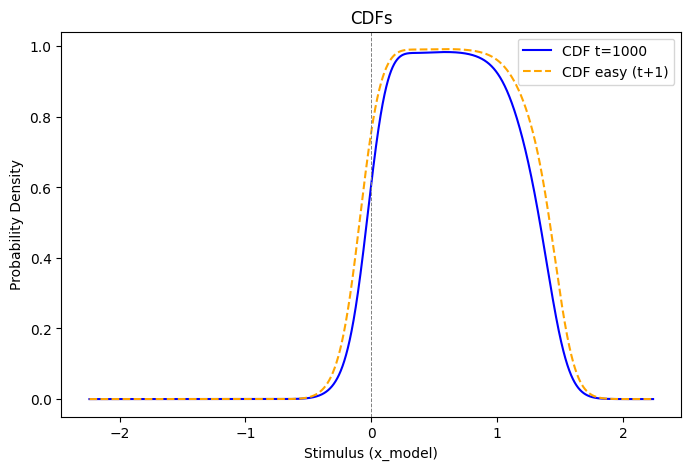

In [54]:
boundary_cdf_easy = yB_easy/(yB_easy+yA_easy)
pdf_easy = np.gradient(boundary_cdf_easy, x_model)


plt.figure(figsize=(8, 5))

# Plot the calculated PDFs
plt.plot(x_model, boundary_cdf_1000, color='blue', label='CDF t=1000', linewidth=1.5)
plt.plot(x_model, boundary_cdf_easy, color='orange', label='CDF easy (t+1)', linestyle='--', linewidth=1.5)

plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.xlabel('Stimulus (x_model)')
plt.ylabel('Probability Density')
plt.title('CDFs')
plt.legend()
plt.show()

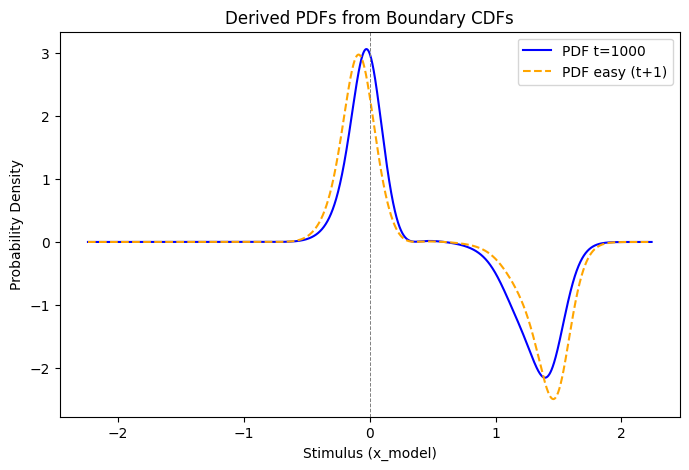

In [55]:
plt.figure(figsize=(8, 5))

# Plot the calculated PDFs
plt.plot(x_model, pdf_1000, color='blue', label='PDF t=1000', linewidth=1.5)
plt.plot(x_model, pdf_easy, color='orange', label='PDF easy (t+1)', linestyle='--', linewidth=1.5)

plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.xlabel('Stimulus (x_model)')
plt.ylabel('Probability Density')
plt.title('Derived PDFs from Boundary CDFs')
plt.legend()
plt.show()

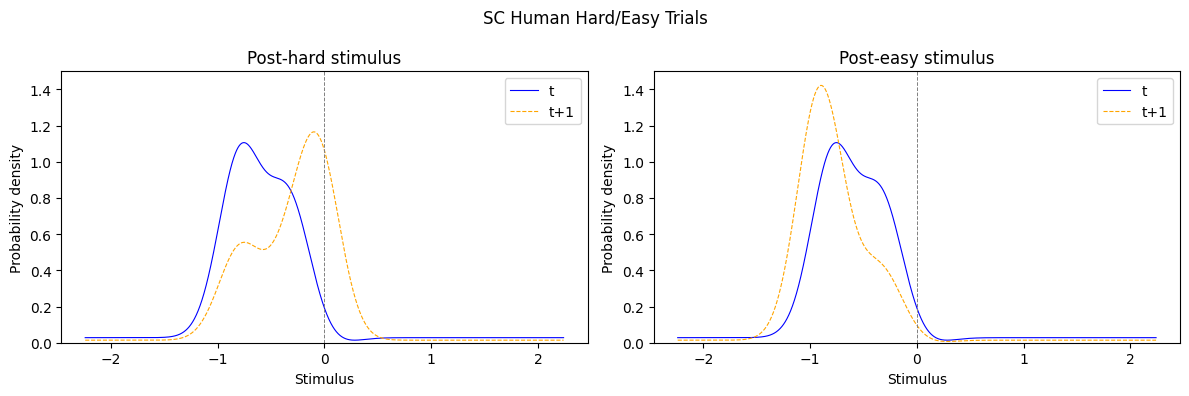

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot for hard stimulus (from cell F6VG6sP7bmlr)
axes[0].plot(x_model, yA_1000_uniform, color='blue', label = 't', linewidth=0.8)
axes[0].plot(x_model, yA_hard, color='orange', label = 't+1',linestyle='--', linewidth=0.8)
axes[0].axvline(0, color='gray', linestyle='--', linewidth=0.7) # Add vertical line at 0
axes[0].set_xlabel('Stimulus')
axes[0].set_ylabel('Probability density')
axes[0].legend()
axes[0].set_title('Post-hard stimulus')
axes[0].set_ylim(0, 1.5)

# Plot for easy stimulus (from cell HvvtiJaxge9E)
axes[1].plot(x_model, yA_1000_uniform, color='blue', label = 't', linewidth=0.8)
axes[1].plot(x_model, yA_easy, color='orange', label = 't+1',linestyle='--', linewidth=0.8)
axes[1].axvline(0, color='gray', linestyle='--', linewidth=0.7) # Add vertical line at 0
axes[1].set_xlabel('Stimulus')
axes[1].set_ylabel('Probability density')
axes[1].legend()
axes[1].set_title('Post-easy stimulus')
axes[1].set_ylim(0, 1.5)

plt.suptitle('SC Human Hard/Easy Trials')
plt.tight_layout()
plt.savefig("SC_human_post_hard_easy_trials-V2.pdf", format="pdf", dpi=300, bbox_inches="tight")

plt.show()